In [1]:
### Trustpilot data scraping module 
## Imports
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from wordcloud import WordCloud, STOPWORDS
import random


In [3]:
# Initialize lists
review_titles = []
review_dates_original = []
review_dates = []
review_ratings = []
review_texts = []
page_number = []

# Set Trustpilot page numbers to scrape here
from_page = 1
to_page = 50


In [4]:
for i in range(from_page, to_page + 1):
    response = requests.get(f"https://dk.trustpilot.com/review/www.alka.dk?page={i}")
    web_page = response.text
    soup = BeautifulSoup(web_page, "html.parser")

    for review in soup.find_all(class_ = "paper_paper__1PY90 paper_square__lJX8a card_card__lQWDv card_noPadding__D8PcU styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"):
        # Review titles
        review_title = review.find(class_ = "typography_typography__QgicV typography_h4__E971J typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3 styles_reviewTitle__04VGJ")
        review_titles.append(review_title.getText())

        # Review ratings
        review_rating = review.find(class_ = "styles_reviewHeader__iU9Px")
        review_ratings.append(review_rating["data-service-review-rating"])
        
        # When there is no review text, append "" instead of skipping so that data remains in sequence with other review data e.g. review_title
        review_text = review.find(class_ = "typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3")
        if review_text == None:
            review_texts.append("")
        else:
            review_texts.append(review_text.getText())
        
        # Trustpilot page number
        page_number.append(i)

# Create final dataframe from lists
df_reviews = pd.DataFrame(list(zip(review_titles, review_ratings, review_texts, page_number)),
                columns =['review_title', 'review_rating', 'review_text', 'page_number'])

In [15]:
df_reviews

,review_title,review_rating,review_text,page_number
0,Vores nabo er igang med at få byggede…,2,Vores nabo er igang med at få byggede et nyt h...,1
1,God service,5,God og hurtig service,1
2,Fin og hurtig hjælp.,5,Efter positiv telefon kontakt fik jeg samme da...,1
3,Super forsikringselskab,5,,1
4,Anmeldte lørdag i påsken,5,"Anmeldte lørdag i påsken, fik svar tirsdag eft...",1
...,...,...,...,...
395,Grim og nedladende tone,1,Grim og nedladende tone. Udvalgt til yderliger...,10
396,god behandling og forslag til omkring…,5,god behandling og forslag til omkring de forsi...,10
397,Behalige med arbejder at snakke med,5,,10
398,Altid god behandling,5,,10


In [5]:
df_reviews['review_title'] = df_reviews['review_title'].apply(lambda x: GoogleTranslator(source='auto').translate(x, dest='en'))
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: GoogleTranslator(source='auto').translate(x, dest='en'))

In [6]:
# save dataframe as a pickle file
df_reviews.to_pickle('dataAlka_50pages.pkl')
df_reviews

,review_title,review_rating,review_text,page_number
0,As usual,5,"As usual, really good treatment",1
1,accidents in Spain,5,"While on holiday in Spain, I got a small blood...",1
2,No hassle,5,No hassle Glad I have my insurance policies wi...,1
3,Good information from insurance agent about…,5,Good information from insurance agent about co...,1
4,Our neighbor is getting built…,2,Our neighbor is in the process of building a n...,1
...,...,...,...,...
995,"Super good treatment, and sweet…",5,"Super good treatment, and sweet staff who are ...",50
996,Reporting damage went quickly and…,5,"Reporting damage went quickly and painlessly, ...",50
997,Can only recommend Alka,5,"Can only recommend Alka, have never had proble...",50
998,Good customer service with friendly and…,5,Good customer service with friendly and helpfu...,50


In [2]:
df = pd.read_pickle('dataAlka_50pages.pkl')
df['review_rating']=pd.to_numeric(df['review_rating'])
df[df['review_rating']<4]

,review_title,review_rating,review_text,page_number
4,Our neighbor is getting built…,2,Our neighbor is in the process of building a n...,1
16,Personal injury,1,I have a personal injury that has not been tre...,1
20,Would not recommend any Alka…,1,Will not recommended any Alka insurance they d...,2
29,Waiting and waiting🤬,1,Now waiting for almost 9 months to receive the...,2
30,Adjusts the prices as it suits them,1,"Adjust the prices as it suits them, it's a goo...",2
...,...,...,...,...
895,Poor workflow,2,"I paid deductible for a glass damage, but rece...",45
913,Conversation,1,Had booked time for a call but it did not happ...,46
915,"I thought they were better, and did not cheat",1,After being a customer of Alka for several yea...,46
939,Until a year ago we were real…,1,Until a year ago we were really well satisfied...,47


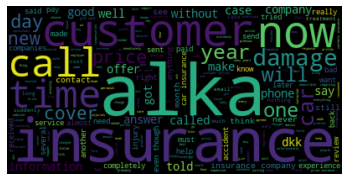

In [3]:
#filter the df to one candidate, and create a list of responses from them
text = df[df['review_rating']<4].review_text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

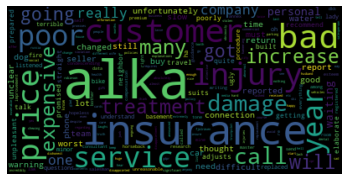

In [4]:
#filter the df to one candidate, and create a list of responses from them
text = df[df['review_rating']<4].review_title.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

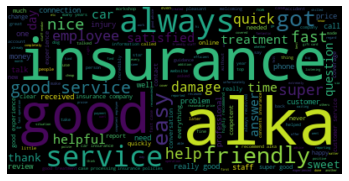

In [5]:
#filter the df to one candidate, and create a list of responses from them
text = df[df['review_rating']>4].dropna().review_text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

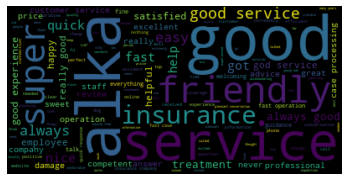

In [6]:
#filter the df to one candidate, and create a list of responses from them
text = df[df['review_rating']>4].dropna().review_title.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()